In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('BostonHousing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [5]:
x = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [6]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,0


In [7]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [8]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
scaler = StandardScaler()
x_train_Scaled = scaler.fit_transform(x_train)
x_test_Scaled = scaler.transform(x_test)

In [14]:
model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss = 'mean_squared_error',metrics=['mae'])

In [19]:
history = model.fit(x_train_Scaled, y_train, epochs=100, batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5600 - mae: 1.3717 - val_loss: 8.3654 - val_mae: 2.1693
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1089 - mae: 1.2921 - val_loss: 8.5910 - val_mae: 2.1811
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6249 - mae: 1.3731 - val_loss: 8.8439 - val_mae: 2.2278
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6358 - mae: 1.3688 - val_loss: 8.3298 - val_mae: 2.1517
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1163 - mae: 1.3033 - val_loss: 7.8917 - val_mae: 2.0762
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2088 - mae: 1.3363 - val_loss: 8.6223 - val_mae: 2.2213
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0586 - mae: 1.2724 - val_loss: 8.5732 - val_mae: 2.1777
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4020 - mae: 1.3522 - val_loss: 8.3011 - val_mae: 2.1522
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.559

In [22]:
y_pred = model.predict(x_test_Scaled).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


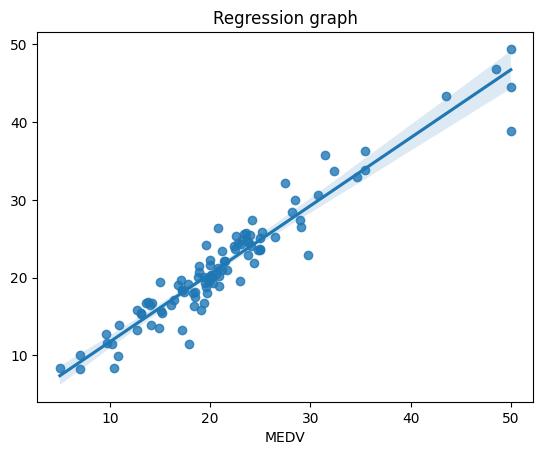

In [27]:
sns.regplot(x=y_test, y= y_pred)
plt.title("Regression graph")
plt.show()

In [32]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)


print(f"\nModel Performance on Test Data:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")



Model Performance on Test Data:
MAE  = 1.86
MSE  = 6.31
RMSE = 2.51
